<a href="https://colab.research.google.com/github/annabellatian/mitFuturemakers/blob/main/predictHousePrices/predictHousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [6]:
# data preprocessing
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housepricedata.csv')
dataset = df.values
x = dataset[:,0:10]
y = dataset[:,10]
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

x_train, x_val_test, y_train, y_val_test = train_test_split(x_scale, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [7]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6810 - accuracy: 0.6751 - val_loss: 0.6791 - val_accuracy: 0.6073
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6258 - val_loss: 0.6742 - val_accuracy: 0.5388
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.5707 - val_loss: 0.6697 - val_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5593 - val_loss: 0.6649 - val_accuracy: 0.5342
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.5939 - val_loss: 0.6598 - val_accuracy: 0.5525
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6153 - val_loss: 0.6546 - val_accuracy: 0.6347
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6574 - val_loss: 0.6491 - val_accuracy: 0.6758
Epoch 8/100


In [8]:
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8721


0.8721461296081543

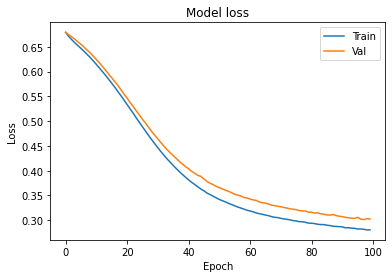

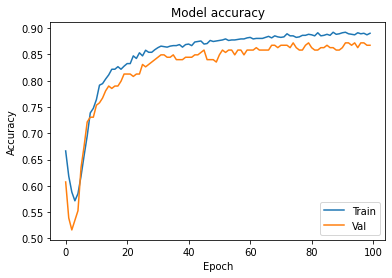

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [10]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 2s 44ms/step - loss: 0.5301 - accuracy: 0.7416 - val_loss: 0.4269 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3450 - accuracy: 0.8764 - val_loss: 0.3675 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3147 - accuracy: 0.8579 - val_loss: 0.3057 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3172 - accuracy: 0.8562 - val_loss: 0.2988 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2692 - accuracy: 0.8971 - val_loss: 0.2868 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2472 - accuracy: 0.8829 - val_loss: 0.2926 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2501 - accuracy: 0.8865 - val_loss: 0.2914 - val_accuracy: 0.8630
Epoch 

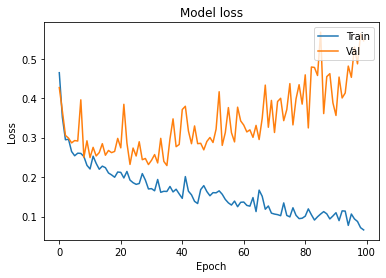

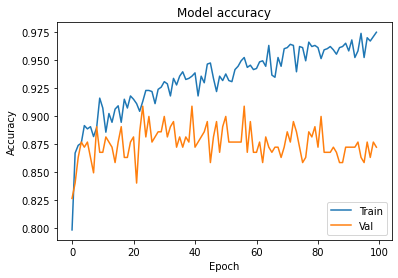

In [11]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [12]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 4s 61ms/step - loss: 21.1244 - accuracy: 0.5572 - val_loss: 3.9177 - val_accuracy: 0.7032
Epoch 2/100
32/32 [==============================] - 1s 43ms/step - loss: 2.5164 - accuracy: 0.7953 - val_loss: 0.6850 - val_accuracy: 0.8265
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.6107 - accuracy: 0.8577 - val_loss: 0.5644 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5387 - accuracy: 0.8463 - val_loss: 0.5637 - val_accuracy: 0.8128
Epoch 5/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4976 - accuracy: 0.8805 - val_loss: 0.4833 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4981 - accuracy: 0.8595 - val_loss: 0.4739 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4566 - accuracy: 0.8752 - val_loss: 0.4732 - val_accuracy: 0.8767
Epoch

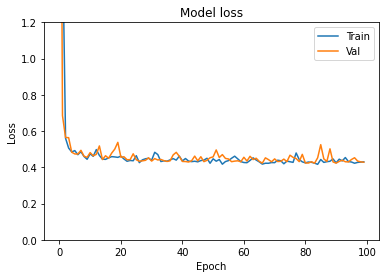

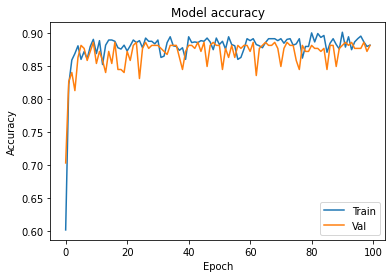

In [13]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()